In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\sms_spam.csv")

In [3]:
df.sample(5)

,type,text
1958,ham,Take something for pain. If it moves however t...
4217,ham,Er mw im filled tuth is aight
1232,ham,have got * few things to do. may be in * pub l...
1898,ham,"Aight, sounds good. When do you want me to com..."
1678,ham,Lol where do u come up with these ideas?


In [4]:
df. head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5574, 2)

# cleaning


In [6]:
df.info

<bound method DataFrame.info of       type                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham               Will ü b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]>

In [7]:
df.sample(5)

,type,text
960,ham,Where @
2485,ham,Only if you promise your getting out as SOON a...
1695,ham,Ü eatin later but i'm eatin wif my frens now l...
4433,ham,Dont think you need yellow card for uk travel....
213,ham,K:)k:)good:)study well.


In [8]:
df.rename(columns={'type':'target'},inplace=True)

In [9]:
df.sample(5)

,target,text
829,ham,"Sorry light turned green, I meant another frie..."
2384,ham,Your pussy is perfect!
3908,ham,No that just means you have a fat head
4979,ham,JADE ITS PAUL. Y DIDN'T U TXT ME? DO U REMEMBE...
494,ham,What class of &lt;#&gt; reunion?


In [10]:
pip install -U scikit-learn

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.sample(5)

,target,text
5161,0,No but the bluray player can
1028,0,Are you not around or just still asleep? :V
5270,0,"""ER, ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD..."
4878,0,The world's most happiest frnds never have the...
4775,0,U repeat e instructions again. Wat's e road na...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

414

In [15]:
df = df.drop_duplicates(keep='first')

# eda

In [16]:
df['target'].value_counts()


0    4518
1     642
Name: target, dtype: int64

In [17]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


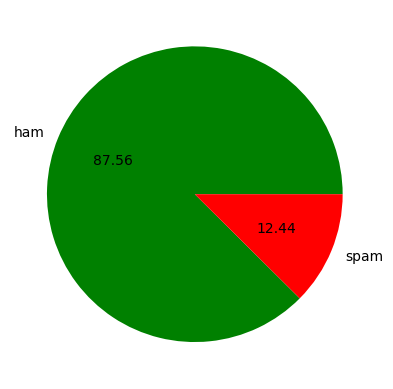

In [18]:
import matplotlib.pyplot as plt
colors = ['green', 'red']
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f",colors=colors)
plt.show()

In [19]:

pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
 df['characters']=df['text'].apply(len)

In [23]:
df.head(6)

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,147


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head(6)


,target,text,characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39


In [26]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head(6)

,target,text,characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [28]:
df[df['target'] == 0][['characters','num_words','num_sent']].describe()

,characters,num_words,num_sent
count,4518.000000,4518.000000,4518.000000
mean,70.860558,17.287074,1.806109
std,56.584422,13.579444,1.281858
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
df[df['target'] == 1][['characters','num_words','num_sent']].describe()

,characters,num_words,num_sent
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.973520
std,29.975596,7.028380,1.479211
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [30]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='characters', ylabel='Count'>

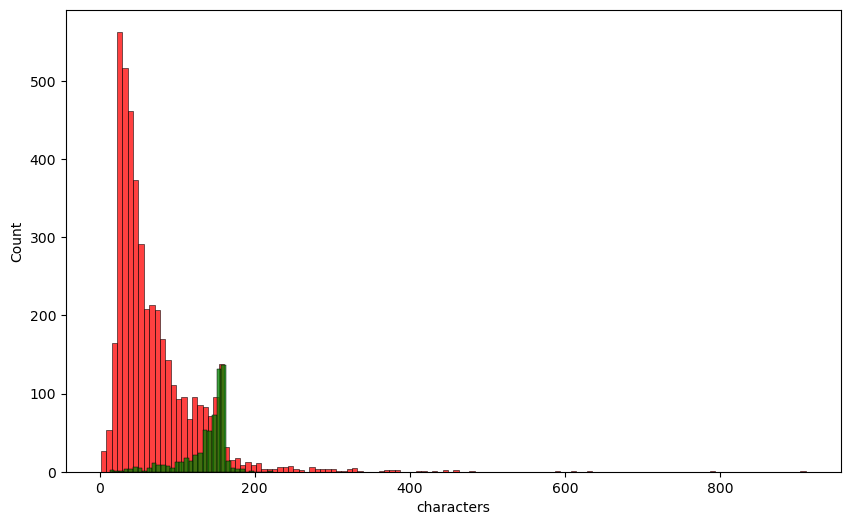

In [31]:

import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['characters'],color='red')
sns.histplot(df[df['target'] == 1]['characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

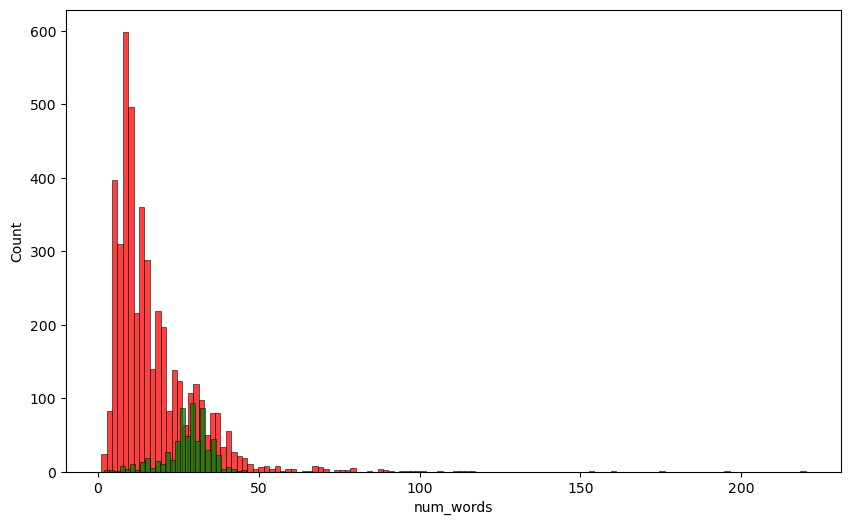

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='red')
sns.histplot(df[df['target'] == 1]['num_words'],color='green')

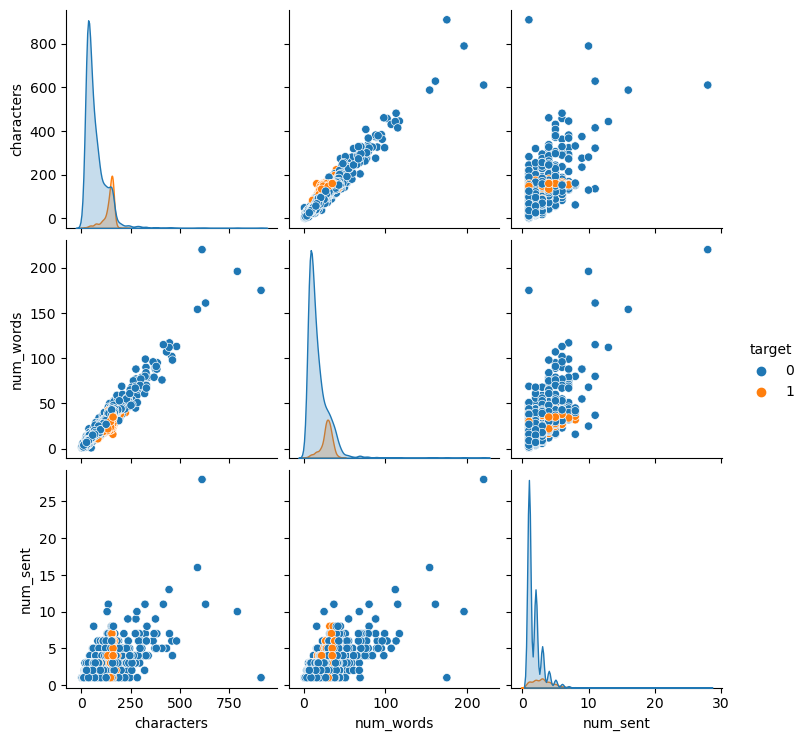

In [33]:
sns.pairplot(df,hue='target')

<Axes: >

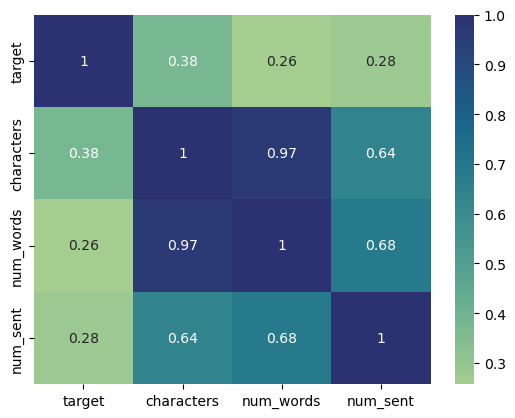

In [34]:
sns.heatmap(df.corr(),annot=True,cmap="crest")

#   DATA PREPROCESSING

In [35]:
import nltk

In [36]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords


In [38]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head(6)

,target,text,characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=550,height=550,min_font_size=10,background_color='black')


In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

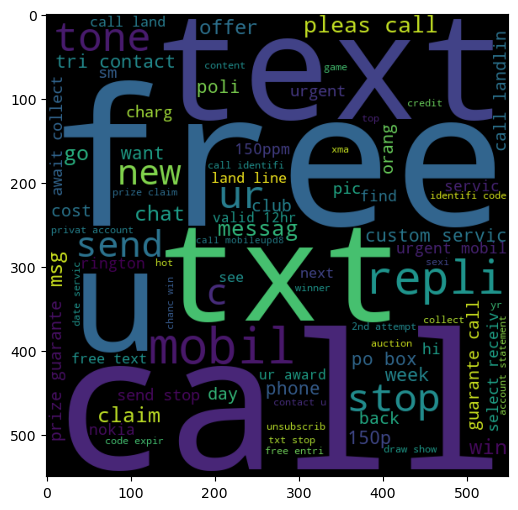

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

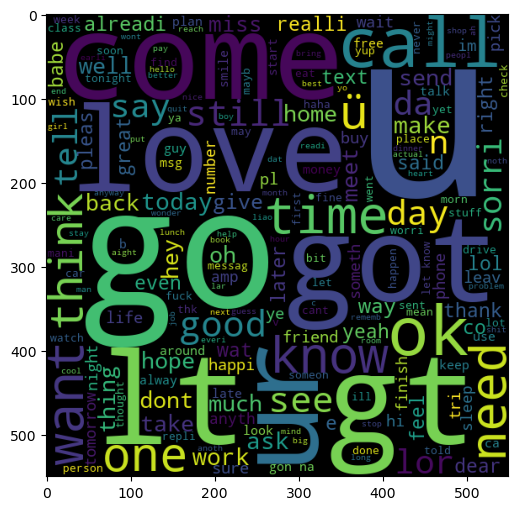

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [51]:
y = df['target'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8701550387596899
[[800 116]
 [ 18  98]]
0.45794392523364486


In [55]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9767441860465116
[[916   0]
 [ 24  92]]
1.0


In [56]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9844961240310077
[[914   2]
 [ 14 102]]
0.9807692307692307


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [59]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
   
}

In [60]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision
    

In [61]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9728682170542635, 0.9489795918367347)

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9728682170542635
Precision -  0.9489795918367347
For  KN
Accuracy -  0.9234496124031008
Precision -  0.9743589743589743
For  NB
Accuracy -  0.9767441860465116
Precision -  1.0
For  DT
Accuracy -  0.9486434108527132
Precision -  0.8888888888888888
For  LR
Accuracy -  0.9515503875968992
Precision -  0.8837209302325582
For  RF
Accuracy -  0.9728682170542635
Precision -  0.9888888888888889
For  AdaBoost
Accuracy -  0.9651162790697675
Precision -  0.8921568627450981
For  BgC
Accuracy -  0.9709302325581395
Precision -  0.9215686274509803
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9603960396039604
For  GBDT
Accuracy -  0.9534883720930233
Precision -  0.9594594594594594


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.976744,1.000000
5,RF,0.972868,0.988889
1,KN,0.923450,0.974359
8,ETC,0.977713,0.960396
9,GBDT,0.953488,0.959459
0,SVC,0.972868,0.948980
7,BgC,0.970930,0.921569
6,AdaBoost,0.965116,0.892157
3,DT,0.948643,0.888889
4,LR,0.951550,0.883721


In [67]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [68]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [69]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [70]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9786821705426356
Precision 0.97


In [71]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [72]:
from sklearn.ensemble import StackingClassifier

In [74]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [75]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 0.944954128440367
